### Immanuella Duke
### Predicting electricity consumption using weather in Paris


### Task
The task is to predict electricity consumption using key weather variables in France

#### Import the libraries

In [12]:
import pandas as pd
import plotly.graph_objects as plt
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import math
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as pltt

In [2]:
#create dataframes from the csv files
electricity_df = pd.read_csv('electricity_2017.csv')
weather_df = pd.read_csv('Paris_weather_data_2017.csv', encoding = 'latin-1')

## Weather x Electricity EDA

In [3]:
#Check for null values in each column: There are no nulls except with the events columns
weather_df.info()

#change the date column to a datetime object
weather_df.Date = pd.to_datetime(weather_df.Date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         365 non-null    object 
 1   high Temp. (°C)              365 non-null    int64  
 2   avg Temp. (°C)               365 non-null    int64  
 3   low Temp. (°C)               365 non-null    int64  
 4   high Dew Point (°C)          365 non-null    int64  
 5   avg Dew Point (°C)           365 non-null    int64  
 6   low Dew Point (°C)           365 non-null    int64  
 7   high Humidity (%)            365 non-null    int64  
 8   avg Humidity (%)             365 non-null    int64  
 9   low Humidity (%)             365 non-null    int64  
 10  high Sea Level Press. (hPa)  365 non-null    int64  
 11  avg Sea Level Press. (hPa)   365 non-null    int64  
 12  low Sea Level Press. (hPa)   365 non-null    int64  
 13  high Visibility (km)

In [4]:
#combine the datasets
weatherxelectricity_df = weather_df
weatherxelectricity_df['Electricity'] = electricity_df['Energie journalière (MWh)']

### Correlation matrix

In [8]:
#Find the correlation matrix of all the featrures
correlation = weather_df.corr()
correlation

high Temp. (°C)  avg Temp. (°C)  low Temp. (°C)  \
high Temp. (°C)                     1.000000        0.976658        0.888110   
avg Temp. (°C)                      0.976658        1.000000        0.962072   
low Temp. (°C)                      0.888110        0.962072        1.000000   
high Dew Point (°C)                 0.856099        0.913373        0.929764   
avg Dew Point (°C)                  0.858129        0.921361        0.944682   
low Dew Point (°C)                  0.843248        0.909771        0.938312   
high Humidity (%)                  -0.394430       -0.378330       -0.333137   
avg Humidity (%)                   -0.642644       -0.562269       -0.424648   
low Humidity (%)                   -0.653028       -0.553089       -0.389762   
high Sea Level Press. (hPa)        -0.253617       -0.308957       -0.365482   
avg Sea Level Press. (hPa)         -0.150903       -0.203274       -0.261217   
low Sea Level Press. (hPa)         -0.088462       -0.135283       -0.190036   
high Visibility (km)                0.498002        0.491896        0.456098   
avg Visibility (km)                 0.599364        0.528101        0.403852   
low Visibility (km)                 0.432615        0.380880        0.291591   
high Wind (km/h)                   -0.081673       -0.020533        0.054929   
avg Wind (km/h)                    -0.199951       -0.118921       -0.007974   
sum Precip. (mm)                   -0.059089       -0.009994        0.052513   
Electricity                        -0.790733       -0.789190       -0.730587   

                             high Dew Point (°C)  avg Dew Point (°C)  \
high Temp. (°C)                         0.856099            0.858129   
avg Temp. (°C)                          0.913373            0.921361   
low Temp. (°C)                          0.929764            0.944682   
high Dew Point (°C)                     1.000000            0.978604   
avg Dew Point (°C)                      0.978604            1.000000   
low Dew Point (°C)                      0.940691            0.979591   
high Humidity (%)                      -0.087426           -0.094926   
avg Humidity (%)                       -0.233558           -0.214550   
low Humidity (%)                       -0.262292           -0.231225   
high Sea Level Press. (hPa)            -0.355841           -0.329256   
avg Sea Level Press. (hPa)             -0.264679           -0.229100   
low Sea Level Press. (hPa)             -0.192708           -0.158419   
high Visibility (km)                    0.434968            0.401721   
avg Visibility (km)                     0.288801            0.280088   
low Visibility (km)                     0.134582            0.138309   
high Wind (km/h)                        0.019975           -0.028561   
avg Wind (km/h)                        -0.096624           -0.120984   
sum Precip. (mm)                        0.132642            0.108504   
Electricity                            -0.712977           -0.713960   

                             low Dew Point (°C)  high Humidity (%)  \
high Temp. (°C)                        0.843248          -0.394430   
avg Temp. (°C)                         0.909771          -0.378330   
low Temp. (°C)                         0.938312          -0.333137   
high Dew Point (°C)                    0.940691          -0.087426   
avg Dew Point (°C)                     0.979591          -0.094926   
low Dew Point (°C)                     1.000000          -0.111733   
high Humidity (%)                     -0.111733           1.000000   
avg Humidity (%)                      -0.218440           0.784955   
low Humidity (%)                      -0.221393           0.564862   
high Sea Level Press. (hPa)           -0.303539           0.060913   
avg Sea Level Press. (hPa)            -0.199631           0.018209   
low Sea Level Press. (hPa)            -0.133562           0.005438   
high Visibility (km)                   0.382905          -0.217346   
avg Vis

The weather variables that are most strongly correlated with the electricity variable are:
avg, high and low temparature and the dew points. 

Those that are moderately correlated are the humidity, visibility variables

Low correlation are: sea level, wind and sum precipation

In [9]:
#Extract correlation between eelctricty and other features
correlation.Electricity

high Temp. (°C)               -0.790733
avg Temp. (°C)                -0.789190
low Temp. (°C)                -0.730587
high Dew Point (°C)           -0.712977
avg Dew Point (°C)            -0.713960
low Dew Point (°C)            -0.698830
high Humidity (%)              0.215993
avg Humidity (%)               0.470663
low Humidity (%)               0.541917
high Sea Level Press. (hPa)    0.192581
avg Sea Level Press. (hPa)     0.087692
low Sea Level Press. (hPa)     0.022092
high Visibility (km)          -0.480324
avg Visibility (km)           -0.473431
low Visibility (km)           -0.317377
high Wind (km/h)               0.125456
avg Wind (km/h)                0.178804
sum Precip. (mm)               0.021129
Electricity                    1.000000
Name: Electricity, dtype: float64

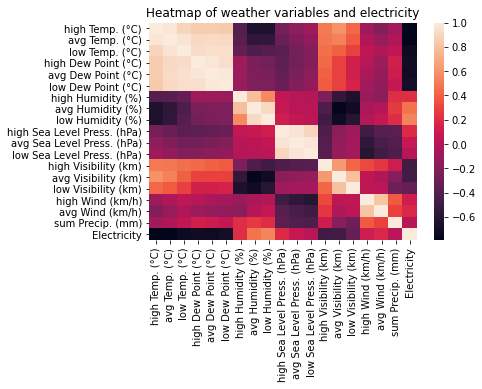

In [15]:
#heatmap for all features
ax = pltt.axes()
sb.heatmap(correlation)
ax.set_title('Heatmap of weather variables and electricity')
pltt.show()

Because of the encoding style in "avg Temp.\xa0(°C)" - I used the '\xa0' to represent a space.
What I should have is to replace the spaces with underscores, for example, as a data cleaning step.

But I was too lazy so...

In [16]:
weatherxelectricity_df

Date  high Temp. (°C)  avg Temp. (°C)  low Temp. (°C)  \
0   2017-01-01                0              -3              -5   
1   2017-01-02                2               0              -2   
2   2017-01-03                1               0              -1   
3   2017-01-04                6               2              -1   
4   2017-01-05                7               3               1   
..         ...              ...             ...             ...   
360 2017-12-27                6               4               3   
361 2017-12-28                6               2              -1   
362 2017-12-29                8               3              -1   
363 2017-12-30               14              10               6   
364 2017-12-31               15              12               9   

     high Dew Point (°C)  avg Dew Point (°C)  low Dew Point (°C)  \
0                     -1                  -3                  -6   
1                      1                   1                  -1   
2                      1                   0                  -1   
3                      4                   1                  -1   
4                      2                   0                  -2   
..                   ...                 ...                 ...   
360                    5                   2                  -2   
361                    1                  -1                  -3   
362                    6                   2                  -1   
363                   12                  10                   4   
364                   10                   8                   4   

     high Humidity (%)  avg Humidity (%)  low Humidity (%)  ...  \
0                  100                94                86  ...   
1                  100                95                88  ...   
2                  100                95                88  ...   
3                  100                87                71  ...   
4                   93                79                59  ...   
..                 ...               ...               ...  ...   
360                 93                82                60  ...   
361                 93                80                57  ...   
362                100                85                54  ...   
363                100                87                73  ...   
364                 88                74                49  ...   

     low Sea Level Press. (hPa)  high Visibility (km)  avg Visibility (km)  \
0                          1020                   7.0                  3.0   
1                          1022                  14.0                  4.0   
2                          1028                   7.0                  2.0   
3                          1023                  19.0                  9.0   
4                          1027                  19.0                 12.0   
..                          ...                   ...                  ...   
360                         982                  31.0                 12.0   
361                         999                  31.0                 16.0   
362                        1000                  31.0                 12.0   
363                        1000                  19.0                  9.0   
364                        1002                  31.0                 14.0   

     low Visibility (km)  high Wind (km/h)  avg Wind (km/h)  \
0                    0.0                10                6   
1                    0.0                16                6   
2                    0.0                14                6   
3                    3.0                23               14   
4                   10.0                14               11   
..                   ...               ...              ...   
360                  6.0                39               24   
361                 10.0                19               13   
362                  3.0                32               13   
363             

## Weather x Electricity data visualization

In [16]:
#plot avg temperatures across all days of the year
fig = px.line(weatherxelectricity_df, x="Date", 
              y=["avg Temp.\xa0(°C)", "avg Dew Point\xa0(°C)"], title='Mean temperature & mean dew point in Paris 2017')
fig.show()

In [17]:
fig = px.scatter(weatherxelectricity_df, y="Electricity", 
              x=["avg Temp.\xa0(°C)", "avg Dew Point\xa0(°C)"],trendline="lowess", title='Temperature and dew point compared to electricity')
fig.show()

In [18]:
fig = px.scatter(weatherxelectricity_df, y="Electricity", 
              x=["avg Humidity\xa0(%)"], trendline="lowess", title='Humidity compared to electricity')
fig.show()

In [19]:
fig = px.scatter(weatherxelectricity_df, y="Electricity", 
              x=["avg Visibility\xa0(km)"], trendline="ols", title='Visibility compared to electricity')
fig.show()

In [20]:
fig = px.line(weatherxelectricity_df, y="Electricity", 
              x=["Date"], title='Electricity usage across 2017 in Paris')
fig.show()

### Data analytics and modelling

In [21]:
#create a new df with only features for modelling
analysis_df = pd.DataFrame(weatherxelectricity_df, columns = ['Date','avg Temp.\xa0(°C)', "avg Humidity\xa0(%)", "avg Visibility\xa0(km)", "Electricity" ])
#setting the index to date just makes the work easier
analysis_df=analysis_df.set_index('Date')

In [22]:
#backfill the nan columns in elctricity
analysis_df['Electricity'] = analysis_df['Electricity'].fillna(method = 'bfill')

In [23]:
#fill the nan columns in visibility
analysis_df['avg Visibility\xa0(km)'] = analysis_df['avg Visibility\xa0(km)'].fillna(method = 'bfill')

### Train test split

In [24]:
#split the dataset 70/30. Don't shuffle to preserve the time series
X_train, X_test, y_train, y_test = train_test_split(analysis_df.iloc[:,:-1], analysis_df.iloc[:,-1], test_size=0.30, random_state=42, shuffle = False)
y_train.index = X_train.index

The SARIMA model is good for timeseries predictions

Read about SARIMAS models here: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

Also read about the ar, d, and ma parameters to the order parameter in SARIMAX
        

In [32]:

model = sm.tsa.statespace.SARIMAX(endog=y_train, exog=X_train, order=(1, 1,(1,0,0,1)))
model_fit = model.fit()
# make prediction 7 days ahead 
yhat = model_fit.forecast(exog =X_test[:7], steps=7)
print("predicted electricity consumption for next 7 days:\n" ,yhat)

##frequency D is used and that's fine since I use daily data

predicted electricity consumption for next 7 days:
 2017-09-13    937742.788981
2017-09-14    936375.911194
2017-09-15    949163.749825
2017-09-16    958500.856611
2017-09-17    963690.679613
2017-09-18    965483.982312
2017-09-19    968417.292017
Freq: D, Name: predicted_mean, dtype: float64


/home/immanuelladuke/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/immanuelladuke/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [34]:
#actual test values
print("actual electricity consumption for next 7 days:\n" ,y_test[:7].values)

actual electricity consumption for next 7 days:
 [1111397. 1144944. 1144745. 1142667. 1139557. 1005676.  947209.]


In [35]:
#calculate mean absolute percentage error and mean absolute error
print('Appropriate metric: MAPE - ', np.mean(np.abs((y_test[:7].values - yhat) / y_test[:7].values)) * 100)
print('Inappropriate metric: MAE - ', mae(y_test[:7], yhat))

Appropriate metric: MAPE -  12.673153416433628
Inappropriate metric: MAE -  142748.0462116132


In [60]:
fig = plt.Figure()
# Create and style plots
fig.add_trace(plt.Scatter(x=yhat.index, y=yhat, name='Predicted',
                         line=dict(color='firebrick', width=4),connectgaps=True))
fig.add_trace(plt.Scatter(x=yhat.index, y=y_test[:7], name = 'Actual',
                         line=dict(color='royalblue', width=4),connectgaps=True))
fig.update_yaxes(rangemode="tozero")
fig.update_layout(title='Predicted vs. Actual electricity consumption')


fig.show()